<a href="https://colab.research.google.com/github/dhana0020/GEN-AI/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 47.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.76MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.5MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.80MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/5] D Loss: 0.4306 G Loss: 1.6171
Epoch [2/5] D Loss: 0.5087 G Loss: 1.7422
Epoch [3/5] D Loss: 0.1236 G Loss: 3.0621
Epoch [4/5] D Loss: 0.4449 G Loss: 3.4706
Epoch [5/5] D Loss: 0.1728 G Loss: 3.3018


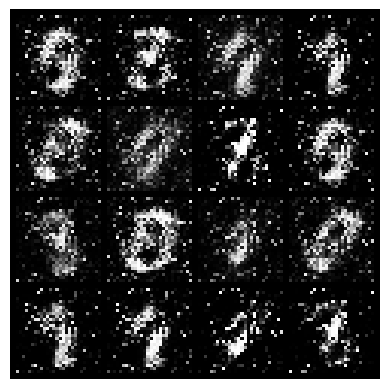

In [ ]:
import torch, torch.nn as nn, torch.optim as optim, torchvision
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
latent_dim, epochs, lr, batch_size = 100, 5, 0.0002, 128

dataloader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(root="./data", train=True, transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))
    ]), download=True),
    batch_size=batch_size, shuffle=True
)

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(100, 256), nn.ReLU(), nn.Linear(256, 512),
                                   nn.ReLU(), nn.Linear(512, 28*28), nn.Tanh())

    def forward(self, z): return self.model(z).view(-1, 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(nn.Linear(28*28, 512), nn.LeakyReLU(0.2),
                                   nn.Linear(512, 256), nn.LeakyReLU(0.2),
                                   nn.Linear(256, 1), nn.Sigmoid())

    def forward(self, img): return self.model(img.view(img.size(0), -1))

G, D = Generator().to(device), Discriminator().to(device)
opt_G, opt_D = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999)), optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCELoss()

for epoch in range(epochs):
    for real, _ in dataloader:
        real = real.to(device); batch = real.size(0)
        z, fake = torch.randn(batch, latent_dim).to(device), G(torch.randn(batch, latent_dim).to(device))

        loss_D = criterion(D(real), torch.ones(batch, 1).to(device)) + criterion(D(fake.detach()), torch.zeros(batch, 1).to(device))
        opt_D.zero_grad(); loss_D.backward(); opt_D.step()

        loss_G = criterion(D(fake), torch.ones(batch, 1).to(device))
        opt_G.zero_grad(); loss_G.backward(); opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}] D Loss: {loss_D.item():.4f} G Loss: {loss_G.item():.4f}")

z = torch.randn(16, latent_dim).to(device)
grid = torchvision.utils.make_grid(G(z).cpu().detach(), normalize=True, nrow=4)
plt.imshow(grid.permute(1, 2, 0)); plt.axis("off"); plt.show()


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

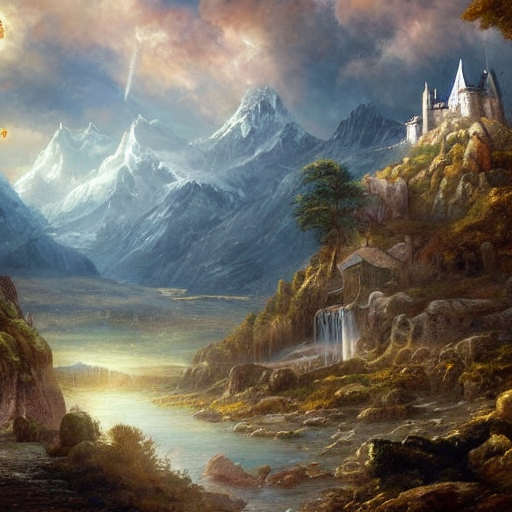

In [ ]:
!pip install torch torchvision diffusers transformers --quiet

from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display  # Import display function

# Load the Stable Diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # Use GPU

# Generate an image
prompt = "A fantasy landscape with mountains and a castle"
image = pipe(prompt).images[0]

# Display the image in notebook
display(image)  # Correct way to print/show images in Kaggle/Colab

# Save the image (optional)
image.save("generated_image.png")


In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())


GPU Available: True


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

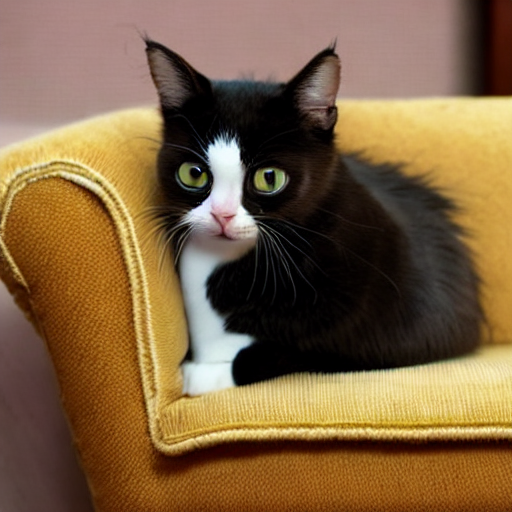

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load Pretrained Model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda")  # Move to GPU

# Function to Generate Image
def generate_image(name):
    image = pipe(name).images[0]  # Generate image from text
    display(image)  # Show the image

# Example Usage
generate_image("a cute cat siting in sofa ")
